<h1><font color='navy'>Grafovi</font><h1>

<blockquote>U ovom poglavlju uvodimo osnovne elemente teorije grafova, koji čine osnovu na kojoj se zasniva oblast <b>Grafovskih neuronskih mreža sa mehanizmom pažnje (GAT)</b>. Zbog velikog spektra primena, kao i izuzetno jednostavne definicije i osnovnih svojstava, grafovi su našli i veliku primenu u mnogim matematičkim oblastima poput kombinatorike, operacionih istrazivanja, linearne algebre, računarstva itd.</blockquote>

<h2><font color='navy'>Osnovni pojmovi teorije grafova</font><h2>

**Definicija 1:** Graf $G$ predstavlja uređeni par $(V,E)$. Elementi skupa $V$ se nazivaju *čvorovi* (eng. *vertex*), a elementi skupa $E$ *grane* (eng. *edge*) grafa $G$ gde je $E \subseteq V \times V$. Dva čvora $u,v$ su <b>susedni</b> ako su spojeni granom $e=\{u,v\}$. Za čvor $u$ i granu $e$ tada kažemo da su <b>*incidentni*</b>. 

Grafovi se prema usmerenosti mogu podeliti na:
- <b>Neusmerene grafove</b>, za koje važi da nemaju svojstvo usmerenja između čvorova sa kojima su incidenti, zbog čega grane smatramo skupovima čvorova i pišemo, npr. $e=\{u,v\}$.
- <b>Usmerene grafove</b>, za koje važi da grane imaju svojstvo usmerenja od jednog čvora, koji se naziva *izlazni čvor* ka drugom čvoru koji se naziva *ulazni čvor*. U tom slučaju, grane grafa ne smatramo skupovima već uređenim parovima i pišemo, npr, $e=(u,v), e=(v,u)$, u zavisnosti od smera usmerenja grane e incidentne sa čvorovima $u,v$.

Grafovi se grafički predstavljaju na sledeći način:
- Svaki čvor se predstavlja jednim krugom
- Svaka grana se predstavlja linijom koja povezuje čvorove sa kojima je incidentna. Ako je graf usmeren, onda se koristi strelica u smeru od izlaznog čvora ka ulaznom čvoru incidentinim sa tom granom.

Na slici su dati primeri 2 grafa:
- Graf $G_1=(V_1,E_1)$, gde je $V_1=\{a,b,c\}, E_1=\{ (a,b),(b,c),(c,b),(c,a)\}$, primer je usmerenog grafa.
- Graf $G_2=(V_1,E_1)$, gde je $V_1=\{a,b,c,d\}, E_1=\{ \{a,b\},\{c,b\},\{a,d\},\{c,d\}\}$, primer je neusmerenog grafa.

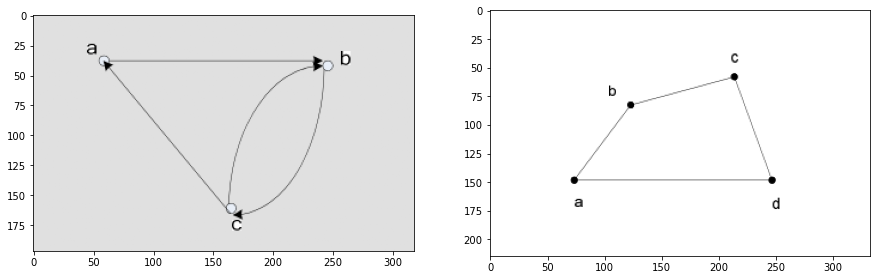

In [14]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams

%matplotlib inline

rcParams['figure.figsize'] = 15 ,10

img_A = mpimg.imread('./da.png')
img_B = mpimg.imread('./ne.png')

fig, ax = plt.subplots(1,2)
ax[0].imshow(img_A)
ax[1].imshow(img_B)


<blockquote> Grafovi su apstraktni pojmovi koji se mogu susresti u svakodnevnom životu i značajni su jer se veliki broj koncepata može modelovati njima.
Ako posmatramo neku geografsku mapu sa mnoštvom gradova koji su povezani nekim putevima-dobijamo jedan graf. Strukturna formula nekog molekula ili jedinjenja predstavlja takođe jedan graf . Društvene mreže se prirodno mogu opisati grafom u kojem se svakom korisniku društvene mreže dodeljuje čvor, a grana između dva čvora postoji ukoliko su korisnici 'prijatelji' (facebook, neusmeren graf), ili ako jedan korisnik 'prati' drugog korisnika(Twitter, usmeren graf).</blockquote>

<h2><font color='navy'>Računarska reprezentacija grafova</font><h2>

<blockquote>S obzirom da postoji veliki broj podataka u problemima koji se modeluju grafovima, postavlja se pitanje izbora njihove reprezentacije u računarima. Najčešće se za predstavljanje grafova koristi matrična reprezentacija.</blockquote>

**Definicija 2:** <b>Matrica susedstva</b> $A$ *grafa* $G=(V,E)$, dimenzija $\mid V\mid \times \mid V\mid$, definiše se na sledeći način: 

$$A_{ij}=
\begin{cases}
1 & \{i,j\} \in E \\
0 & \{i,j\} \notin E \\
\end{cases}
$$

Ako je graf neusmeren, onda je matrica A simetrična, pa nije potrebno čuvati sve elemente matrice, već samo njenu gornje-trougaonu reprezentaciju. Čak i ako grafovi nisu neusmereni, oni su često *retki*, odnosno, nemaju veliki broj grana, pa se matrice susedstava čuvaju u specifičnim strukturama podataka koje se nazivaju retke matrice. One imaju dve značajne pogodnosti za korišćenje u odnosu na ne-retke matrice.
- Ne-retke matrice zahtevaju memorijski prostor asimptotske složenosti $O(\mid V\mid^2)$, dok retke matrice zahtevaju memorijski prostor asimptotske složenosti $O(\mid E\mid)$.
- Operacije koje se izvršavaju nad retkim matricama su efikasnije u odnosu na operacije nad uobičajenim reprezentacijama matricama. U algoritmima mašinskog učenja, značajna operacija je množenje matrica i vektora. Složenost je ista kao i u prethodnom primeru, i to značajno ubrzava proces.

<h2><font color='navy'>Grafovske neuronske mreže</font><h2>

<b>Konvolutivne neuronske mreže</b> (CNNs) su uspešno rešavale probleme klasifikacije slika ili semantičke segmentacije, gde podaci imaju strukturu nalik mreži. Međutim mnogi zanimljivi problemi uključuju podatke koji se ne mogu predstaviti u mrežnoj strukturi i koji se zasnivaju na neregularnom domenu. Ovo je slučaj sa društvenim mrežama, telekomunikacionim mrežama, moždanim konektorima itd. Takvi podaci se obično mogu predstaviti u obliku <b>grafa</b> (kao što je opisano u prethodnim primerima).

<blockquote><b>Grafovske neuronske mreže sa mehanizmom pažnje (GATs)</b> su novije neuronske mreže koje rade sa podacima koji su predstavljeni i strukturirani grafom, koje koriste maskirane slojeve mehanizma pažnje kako bi unapredili i poboljšali nedostatke starijih algoritama koji su bili bazirani na grafovskim konvolutivnim mrežama. Slaganjem slojeva u kojima čvorovima može da se pristupi preko karakteristika njegovih susednih čvorova, omogućavamo implicitno navođenje različitih težina za različite čvorove u susedstvu, bez potrebe za bilo kakvom zahtevnom matričnom operacijom (kao što je npr. inverzija). Na ovaj način je obuhvaćeno nekoliko ključnih izazova neuronskih mreža i činimo model jednako primenljivim i na induktivne i transduktivne probleme. Naši GAT modeli su dali rezultate nad bazom podataka Cora.</blockquote>

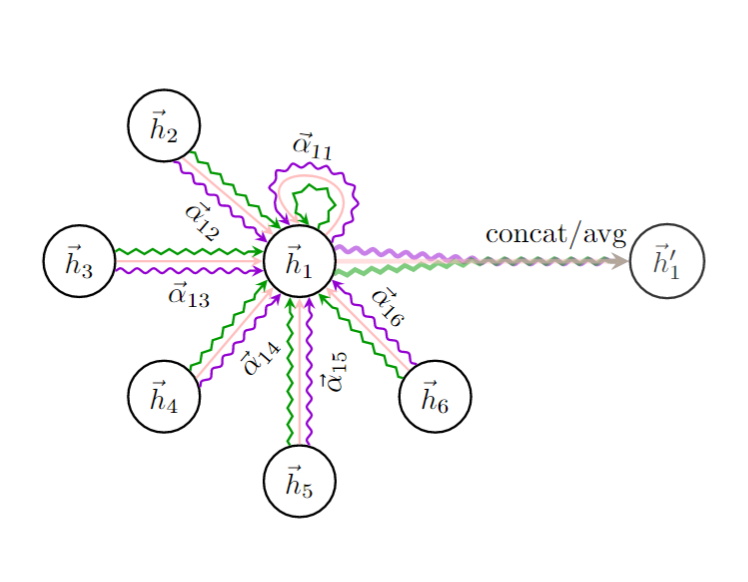

In [4]:
from IPython.display import Image
Image('./gat slika1.png')

Pravilo propagacije kod grafovskih neuronskih mreža je definisano na sledeći način:

$$
H^{(k+1)} = \sigma \bigl(\hat{A}H^{(k)}W^{(k)}\bigr)
$$

gde je sa $k$ numerisan sloj mreže, $\sigma$ je aktivaciona funkcija, $H^{(0)}=X$, tj. ulazna matrica prediktora, $\hat{A} = \tilde{D}^{-\frac{1}{2}}\tilde{A}\tilde{D}^{-\frac{1}{2}}$ simetrična normalizovana matrica susedstva grafa $G$ sa dodatim petljama za svaki čvor, gde je $\tilde{A} = A+I_N$ ($N$ je broj čvorova, $A$ je matrica susedstva) i $\tilde{D}_{ii} = \sum_{j}^{}\tilde{A}_{ij}$, $W^{(k)}$ je matrica parametara modela za sloj $k$.
Matrica susedstva se normalizuje da bi proces optimizacije kroz duboku neuronsku mrežu bio stabilniji.
Dakle, arhitektura je slična kao kod potpuno povezanih neuronskih mreža, samo što je dodata i matrica susedstva čvorova grafa.
<br/> Primer grafovske neuronske mreže sa dva sloja je:

$$
f(X,A) = softmax\bigl(\hat{A} \hspace{1.2mm} LeakyReLU(\hat{A}XW^{(0)})W^{(1)}\bigr)
$$

Gde je $W^{(0)} \in \mathbb{R}^{d \times h^{(0)}}$ matrica parametara za sloj koji spaja ulazne podatke dimenzije $d$ i podatke prvog skrivenog sloja dimenzije $h^{(0)}$, a $W^{(1)} \in \mathbb{R}^{h^{(0)} \times h^{(1)}}$ je matrica parametara za sloj koji spaja skrivene podatke i izlazne podatke.
Na izlazu iz ulaznog sloja primenjuje se aktivaciona funkcija LeakyReLU, a na izlazu iz skrivenog sloja primenjuje se aktivaciona funkcija softmax. Ove dve funkcije su definisane sledećim formulama:

$$
LeakyReLU(x) = max(\alpha x, x), \alpha >0
$$

$$
softmax(x_j) = \frac{exp(x_j)}{\sum_{i}^{}exp(x_i)}
$$

<h3><font color='navy'>Mehanizam pažnje nad grafom</font><h3>

Ulazni podaci za sloj sa mehanizmom pažnje čine skup $h=\{h_1,h_2,...,h_N\}$, $h_i \in \mathbb{R}^F$, gde je $N$ broj čvorova grafa, a $F$ je dimenzija atributa za svaki čvor. Izlazni podaci ovog sloja čine novi skup atributa $\{h_1',h_2',...,h_N'\}$, $h_i' \in \mathbb{R}^{F'}$, potencijalno različite dimenzije $F'$.
Izlazni podaci se računaju sledećom formulom:

$$
h_i' = \sigma\biggl(\sum_{j \in N_i}^{} \alpha_{ij}Wh_j\biggr)
$$

gde je $\sigma$ aktivaciona funkcija, $N_i$ skup suseda $i$-tog čvora, $W \in \mathbb{R}^{F'\times F} $ matrica parametara koja je ista za svaki čvor, $\alpha_{ij}$ normalizovani koeficijenti pažnje (eng. *normalised attention coefficients*).
Normalizovani koeficijent pažnje $\alpha_{ij}$ nam govori o važnosti atributa $j$-tog čvora za $i$-ti čvor. Postupak za njegovo izračunavanje dat je sledećom formulom:

$$
\alpha_{ij} = \frac{exp(e_{ij})}{\sum_{k \in N_i}^{}exp(e_{ik})}
$$

gde su $e_{ik}$ koeficijenti pažnje i oni se računaju sledećom formulom:

$$
e_{ij} = a(Wh_i, Wh_j)
$$

gde je $a: \mathbb{R}^{F'} \times \mathbb{R}^{F'} \rightarrow \mathbb{R}$ funkcija koja se naziva mehanizmom pažnje (eng. *attention mechanism*).
U našem zadatku će mehanizam pažnje biti jednoslojna neuronska mreža parametrizovana vektorom $\vec{a} \in \mathbb{R}^{2F'}$, na koju se primenjuje aktivaciona funkcija LeakyReLU.


Dakle, formula za izračunavanje normalizovanih koeficijenata pažnje je data sa:

$$
\alpha_{ij} = \frac{exp\bigl(LeakyReLU\bigl(\vec{a}^T[Wh_i\parallel Wh_j]\bigr)\bigr)}{\sum_{k \in N_i}^{}exp\bigl(LeakyReLU\bigl(\vec{a}^T[Wh_i\parallel Wh_j]\bigr)\bigr)}
$$

gde je $\parallel$ operacija nadovezivanja, a $^{T}$ operacija transponovanja.

Radi stabilizacije procesa učenja pažnje, koristi se mehanizam višestruke pažnje (eng. *multi-head attention*), u kojem koristimo $K$ nezavisnih mehanizama pažnje i pomoću svakog dobijamo izlazne atribute. Nakon toga se izlazni atributi nadovezuju i dobijamo sledeću reprezentaciju izlaznih atributa:

$$
h_i' = \parallel\sigma\biggl(\sum_{j \in N_i}^{}\alpha_{ij}^kW_kh_j\biggr)
$$

gde je $\parallel$ operacija nadovezivanja atributa za $k$ od 1 do $K$, $\alpha_{ij}^k$ su normalizovani koeficijenti pažnje izračunati pomoću $k$-tog mehanizma pažnje, $W_k$ je odgovarajuća matrica parametara. Primetimo da će u ovom slučaju dimenzija izlaznog čvora biti $KF'$. Posebno, u poslednjem sloju neuronske mreže umesto nadovezivanja vrši se uprosečavanje, kako bi se dobio izlaz odgovarajuće dimenzije, nakon čega se vrši konačna nelinearna transformacija (npr. softmax u slučaju klasifikacije). Dakle, izlazni atributi poslednjeg sloja su dati formulom:

$$
h_i' = \sigma\biggl(\frac{1}{K}\sum_{k=1}^{K}\sum_{j \in N_i}^{}\alpha_{ij}^kW_kh_j\biggr)
$$